In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Base.csv")

In [3]:
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


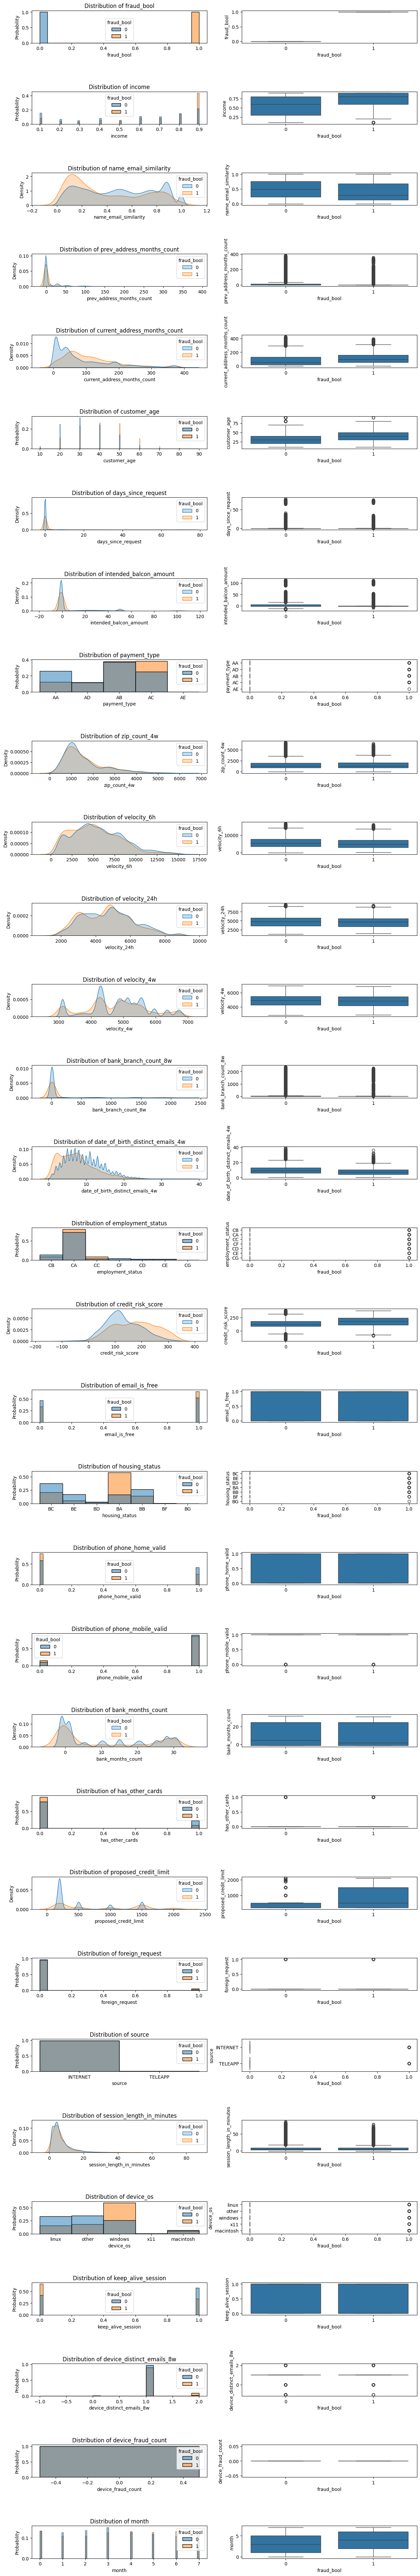

In [5]:
fig, axes = plt.subplots(len(df.columns),2, figsize=(15,100))
plt.subplots_adjust(hspace=1.5)

for i, col in enumerate(df.columns):

    axes[i,0].set_title(f"Distribution of {col}")
    if len(df[col].unique()) > 10:
        sns.kdeplot(df, x=col, hue="fraud_bool", fill=True,  ax=axes[i,0], common_norm=False)
    else:
        sns.histplot(x=col, hue="fraud_bool", data=df, ax=axes[i,0], stat="probability", common_norm=False)
    
    #sns.kdeplot(df, x=col, hue="fraud_bool", fill=True, common_norm=False, ax=axes[i,0])
    sns.boxplot(x="fraud_bool", y=col, data=df , ax=axes[i,1])

### A few observations:

1. There is a big class imbalance. 1% of transactions are labelled as fraudulent, we'll have to adress this later.
2. There are a few categorical features that we will encode using one-hot encoding.
3. Some numerical features are heavily skewed, we will have to do some transformation to help some models.
4. Some columns have a lot of missing values (-1), those missing values seem significant, so we will encode them with a new feature, and replace them with the mean.


In [6]:
missing_values_columns = ["prev_address_months_count","current_address_months_count","bank_months_count"]
missing_values_flag_columns = ["prev_address_months_count_flag","current_address_months_count_flag","bank_months_count_flag"]

df["prev_address_months_count_flag"] = (df["prev_address_months_count"]==-1).astype(int)
df["current_address_months_count_flag"] = (df["current_address_months_count"]==-1).astype(int)
df["bank_months_count_flag"] = (df["bank_months_count"]==-1).astype(int)

prev_address_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["prev_address_months_count"] = df["prev_address_months_count"].replace(-1, prev_address_months_count_mean)

current_address_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["current_address_months_count"] = df["current_address_months_count"].replace(-1,current_address_months_count_mean)

bank_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["bank_months_count"] = df["bank_months_count"].replace(-1,bank_months_count_mean)


<Axes: ylabel='Frequency'>

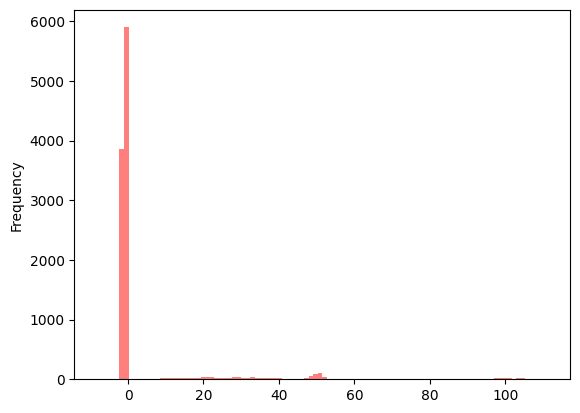

In [8]:
df[df["fraud_bool"]==1]["intended_balcon_amount"].plot.hist(bins=100, alpha=0.5, color='red', label='Fraud')

To adress the skew in the numerical features, we simply apply a log transformation.

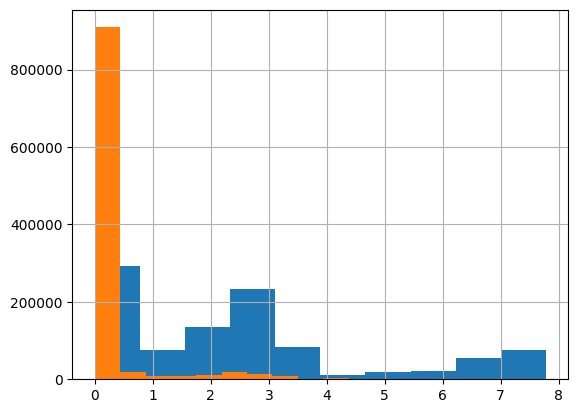

In [9]:
df["bank_branch_count_8w"].apply(lambda x : np.log(x+1)).hist()

df["bank_branch_count_8w"] = df["bank_branch_count_8w"].apply(lambda x : np.log(x+1))

df["days_since_request"].apply(lambda x : np.log(x+1)).hist()
df["days_since_request"] = df["days_since_request"].apply(lambda x : np.log(x+1))

df["positive_intented_balcon_amount"] = df["intended_balcon_amount"].apply(lambda x : np.log(1+x) if x>0 else 0)

df["negative_intented_balcon_amount"] = df["intended_balcon_amount"].apply(lambda x : np.log(1-x) if x<0 else 0)



We one-hot encode the categorical features

In [10]:
categorical_columns = ["device_os","source", "housing_status", "employment_status", "payment_type"]
# create one hot encoding
df = pd.get_dummies(df, columns=categorical_columns)
categorical_columns = [col for col in df.columns if "device_os" in col or "source" in col or "housing_status" in col or "employment_status" in col or "payment_type" in col or "_flag" in col]
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE
0,0,0.3,0.986506,60.719967,25.0,40,0.006713,102.453711,1059,13096.035018,...,False,False,False,False,False,True,False,False,False,False
1,0,0.8,0.617426,60.719967,89.0,20,0.010044,-0.849551,1658,9223.283431,...,False,False,False,False,False,False,False,False,True,False
2,0,0.8,0.996707,9.000000,14.0,40,0.012241,-1.490386,1095,4471.472149,...,False,False,False,False,False,False,True,False,False,False
3,0,0.6,0.475100,11.000000,14.0,30,0.006967,-1.863101,3483,14431.993621,...,False,False,False,False,False,False,True,False,False,False
4,0,0.9,0.842307,60.719967,29.0,40,1.908449,47.152498,2339,7601.511579,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,60.719967,143.0,30,0.050074,-0.826239,530,6732.602414,...,False,False,False,False,False,False,True,False,False,False
999996,0,0.9,0.824544,60.719967,193.0,30,0.009545,0.008307,408,1574.293294,...,False,False,False,False,False,False,False,True,False,False
999997,0,0.8,0.140891,60.719967,202.0,10,0.057596,50.609995,749,1258.864938,...,False,False,False,False,False,True,False,False,False,False
999998,0,0.9,0.002480,52.000000,3.0,30,0.023089,-1.313387,707,7048.137128,...,False,False,False,False,False,False,True,False,False,False


In [11]:
from sklearn.ensemble import RandomForestClassifier

To adress the class imbalance, we will use SMOTENC, a variant of SMOTE that can handle categorical features. We will use it to oversample the minority class.

In [13]:
from imblearn.over_sampling import SMOTENC

In [14]:
sm = SMOTENC(random_state=0, categorical_features=categorical_columns)

In [16]:
train_df = df.sample(frac=0.8,random_state=200)
val_df = df.drop(train_df.index)

In [18]:
X_res, y_res = sm.fit_resample(train_df.drop("fraud_bool", axis=1), train_df["fraud_bool"])

In [39]:
y_res.value_counts()

fraud_bool
0    791172
1    791172
Name: count, dtype: int64

In [19]:
rf_res = RandomForestClassifier(n_estimators=100, max_depth=10)

In [20]:
rf_res.fit(X_res, y_res)

RandomForestClassifier(max_depth=10)

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
only_fraud = val_df[val_df["fraud_bool"]==1]

In [23]:
rf_res.score(val_df.drop("fraud_bool", axis=1), val_df["fraud_bool"])

0.94217

In [24]:
rf_res.score(only_fraud.drop("fraud_bool", axis=1), only_fraud["fraud_bool"])

0.3961835529304861

In [25]:
roc_auc_score(val_df["fraud_bool"], rf_res.predict_proba(val_df.drop("fraud_bool", axis=1))[:,1])

0.8425892152130102

For tabular data, an XGBoost model is often a solid choice. It doesn't need much preprocessing, and it's fast and accurate. We will use it as our baseline.

In [42]:
from xgboost import XGBClassifier

In [43]:
xgb = XGBClassifier(eta=0.003, max_depth=6, n_estimators=100, eval_metric="rmse")

In [47]:
xgb.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.003, eval_metric='rmse',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [48]:
xgb.score(val_df.drop("fraud_bool", axis=1), val_df["fraud_bool"])

0.885575

In [49]:
xgb.score(only_fraud.drop("fraud_bool", axis=1), only_fraud["fraud_bool"])

0.5106769650159019

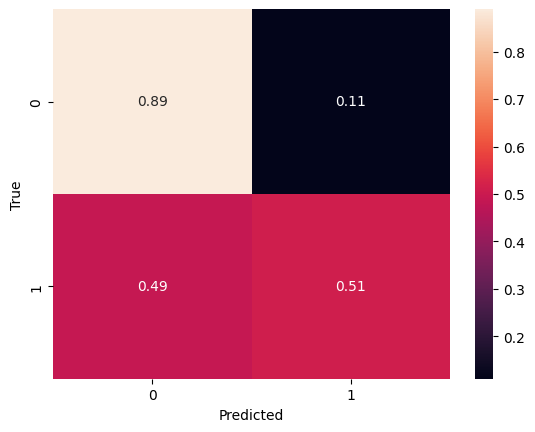

In [54]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1], normalize="true")
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plot_confusion_matrix(val_df["fraud_bool"], xgb.predict(val_df.drop("fraud_bool", axis=1)))

In [32]:
xgb.fit(X_res, y_res)   

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.003, eval_metric='rmse',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
rf_res.feature_importances_

array([1.52300798e-02, 3.67119458e-03, 7.80548007e-03, 2.35527767e-02,
       5.18584624e-02, 3.52212112e-03, 8.51268757e-03, 5.06731530e-04,
       9.09003246e-04, 8.38132550e-04, 1.31087837e-03, 4.26443602e-03,
       2.55386825e-03, 1.27220416e-03, 9.78216235e-05, 8.63362301e-02,
       7.27963142e-03, 3.01238684e-02, 3.92294707e-02, 4.86149943e-03,
       9.57159023e-05, 4.30618431e-04, 1.13252686e-01, 9.26579227e-05,
       0.00000000e+00, 7.75754645e-04, 8.94470912e-02, 1.75675845e-05,
       2.21122336e-03, 1.19531772e-02, 4.84128515e-02, 7.77083035e-02,
       5.51877050e-03, 6.08343831e-02, 3.89537092e-02, 3.80334331e-04,
       3.18327829e-05, 4.04713325e-05, 7.43557036e-02, 4.78968552e-02,
       2.42447539e-02, 1.06536241e-03, 4.08695150e-02, 1.56443636e-05,
       6.67014695e-08, 1.35810247e-02, 1.00768923e-02, 5.02540861e-04,
       5.51729859e-04, 1.88502910e-04, 1.14978192e-03, 2.79291055e-07,
       3.08352514e-02, 2.16633017e-03, 1.57351576e-03, 7.03209296e-03,
      

In [63]:
df.columns[rf_res.feature_importances_.argsort()[::-1]]

Index(['session_length_in_minutes', 'month', 'email_is_free',
       'negative_intented_balcon_amount', 'source_TELEAPP',
       'device_os_macintosh', 'current_address_months_count',
       'positive_intented_balcon_amount', 'housing_status_BA',
       'housing_status_BD', 'bank_months_count', 'device_os_other',
       'employment_status_CG', 'phone_mobile_valid', 'housing_status_BB',
       'prev_address_months_count', 'fraud_bool', 'housing_status_BG',
       'bank_months_count_flag', 'employment_status_CA', 'days_since_request',
       'name_email_similarity', 'phone_home_valid', 'payment_type_AC',
       'device_os_linux', 'has_other_cards', 'velocity_4w', 'income',
       'customer_age', 'bank_branch_count_8w',
       'current_address_months_count_flag', 'payment_type_AA',
       'payment_type_AB', 'velocity_24h', 'date_of_birth_distinct_emails_4w',
       'employment_status_CE', 'housing_status_BC', 'zip_count_4w',
       'velocity_6h', 'device_fraud_count', 'employment_status_C

Partial Dependence Plot


In [56]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

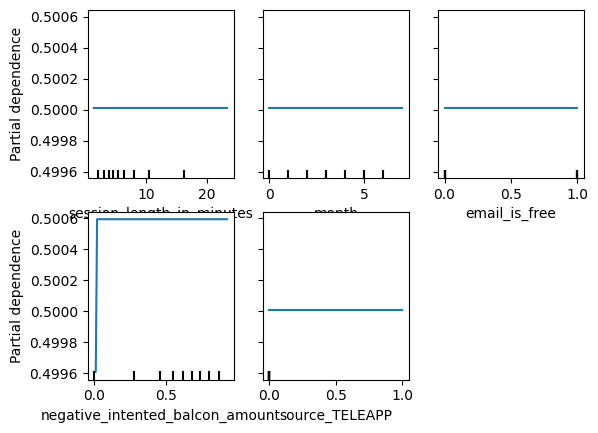

In [93]:
features = ['session_length_in_minutes', 'month', 'email_is_free','negative_intented_balcon_amount', 'source_TELEAPP']

# Create the PDP
display = PartialDependenceDisplay.from_estimator(
    xgb,
    X_res,
    features,
    subsample=10000,  
    n_jobs=-1,  
    grid_resolution=100, 
    random_state=42,
)


### Logistic Regression
In an effort to get more intuition about the interpretablity of results, we will also train a logistic regression model. 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

We now need to scale the data for the logistic regression model.

In [69]:
numerical_columns = [col for col in df.columns if df[col].unique().shape[0]>10 and col not in categorical_columns]

In [70]:
numerical_columns

['name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'positive_intented_balcon_amount',
 'negative_intented_balcon_amount']

In [72]:
scaler = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_columns)
], remainder='passthrough')

X_res_scaled = scaler.fit_transform(X_res)


In [87]:
lr = LogisticRegression(max_iter=10000)

In [88]:
lr.fit(X_res_scaled, y_res)

LogisticRegression(max_iter=10000)

In [90]:
lr.score(scaler.fit_transform(val_df.drop("fraud_bool", axis=1)), val_df["fraud_bool"])

0.950905

In [91]:
lr.score(scaler.fit_transform(only_fraud.drop("fraud_bool", axis=1)), only_fraud["fraud_bool"])

0.30531576556110857

In [94]:
#auc
roc_auc_score(val_df["fraud_bool"], lr.predict_proba(scaler.fit_transform(val_df.drop("fraud_bool", axis=1)))[:,1])


0.8333705615211349

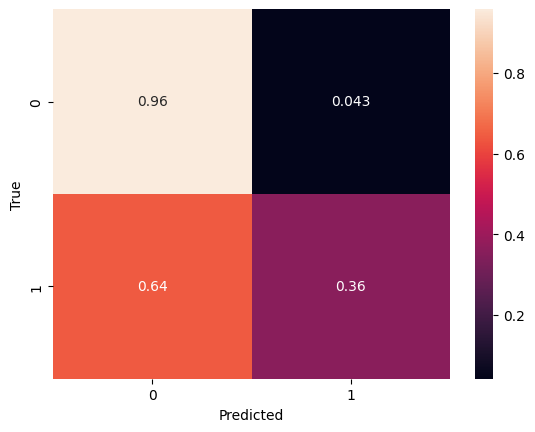

In [95]:

plot_confusion_matrix(val_df["fraud_bool"], lr.predict(scaler.fit_transform(val_df.drop("fraud_bool", axis=1))))

In [100]:
coefs = pd.DataFrame(lr.coef_, columns=df.drop("fraud_bool", axis=1).columns).T

In [108]:
coefs.columns = ["coef"]
coefs = coefs.sort_values("coef", ascending=False)

coefs["Odds Ratio"] = np.exp(coefs["coef"])

<Axes: >

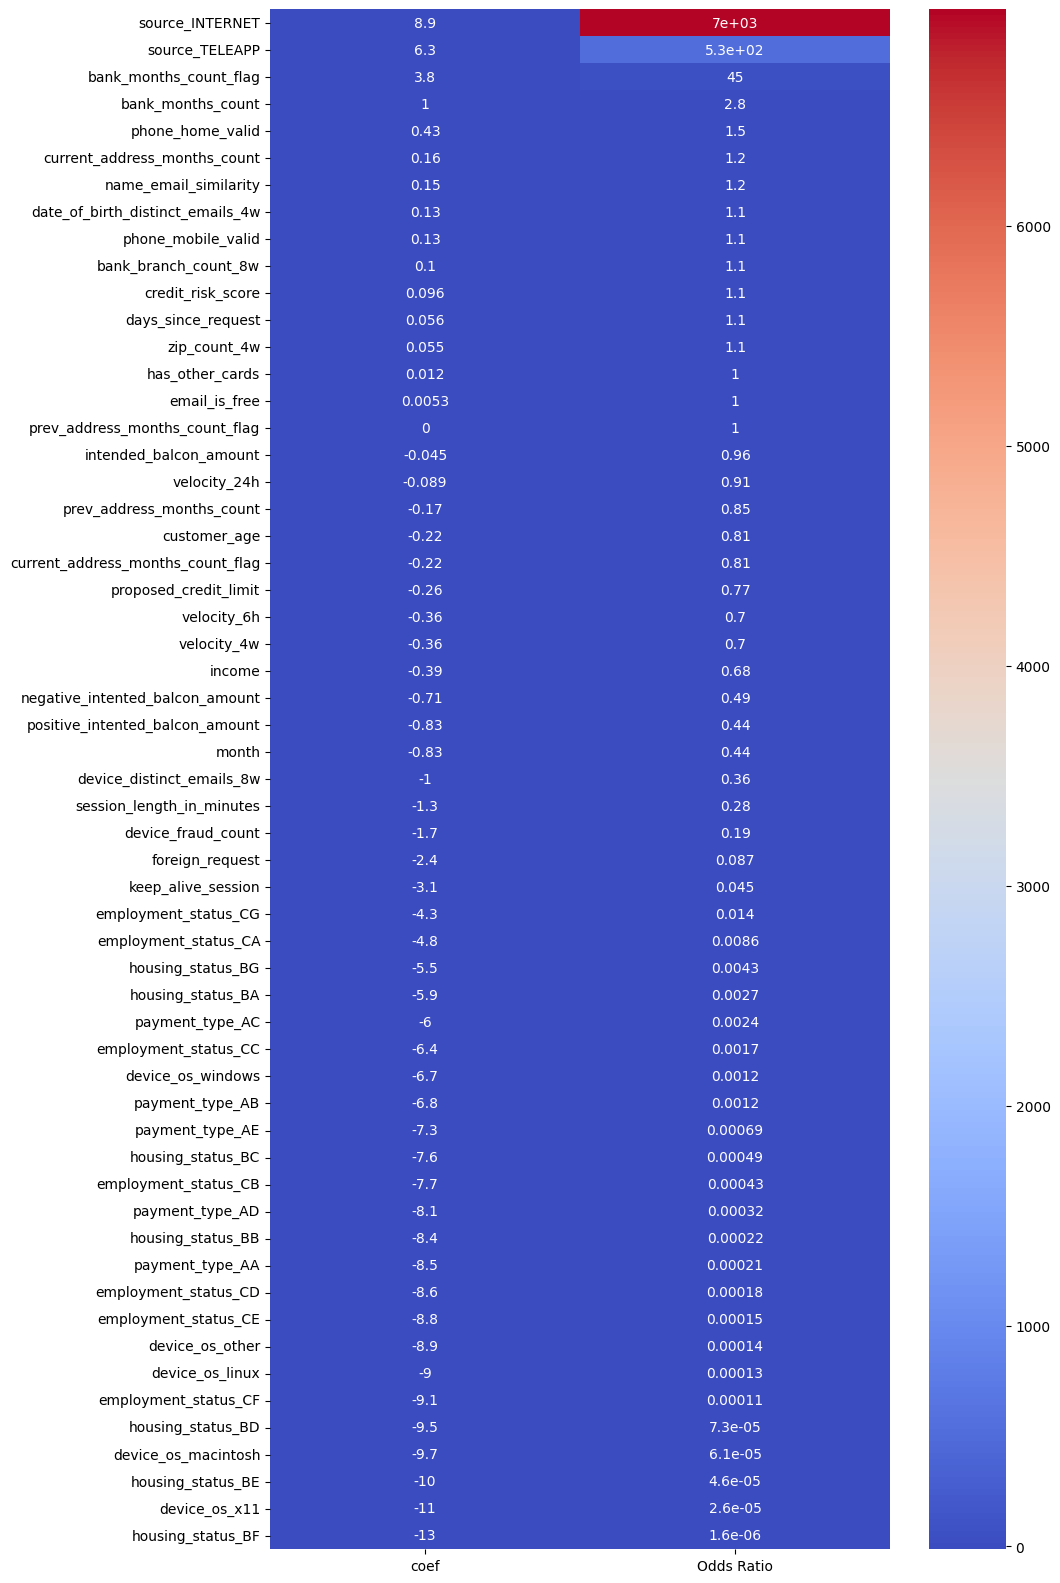

In [123]:
plt.figure(figsize=(10,20))
sns.heatmap(coefs, annot=True, cmap="coolwarm")

<Axes: >

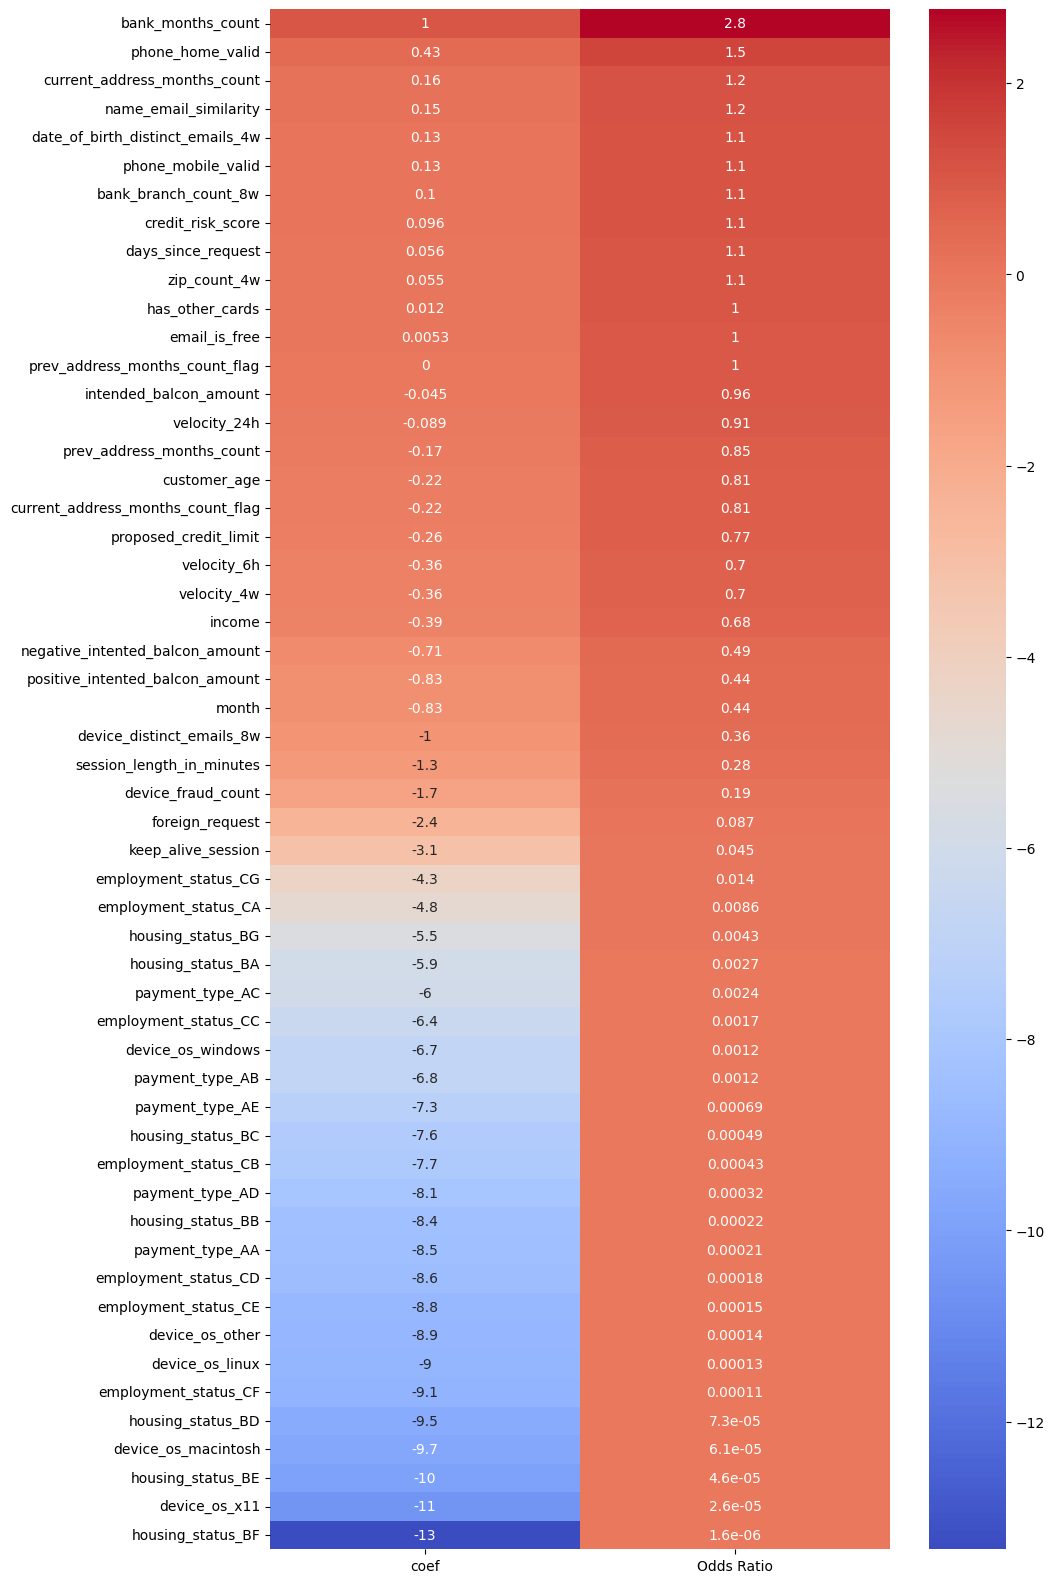

In [128]:
plt.figure(figsize=(10,20))

sns.heatmap(coefs.drop(["source_INTERNET","source_TELEAPP", "bank_months_count_flag"]), annot=True, cmap="coolwarm")